# Corvette Pricing Models

Uncomment the last two lines to install a library.

In [1]:
# Install a conda package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install openpyxl

Import the data

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
from datetime import date

In [3]:
df_price_table = pd.read_excel("Corvette_Price.xlsx")

Get rid of rows with all NaN for VIN

In [4]:
df_price_table = df_price_table.dropna(subset=['VIN'])

If the date listed is not known, then substitute with a value from "Date" and cacluate days aged

In [5]:
df_price_table.loc[:,'Date Listed'].fillna(df_price_table.Date, inplace=True)
df_price_table['DaysAged'] = -(df_price_table['Date Listed'] - pd.Timestamp.now().normalize() ).dt.days

Take a look at the final results

In [6]:
df_price_table

,Stock Number,VIN,TRIM,Year,Mileage,Transmission,HP,Roof,Price,Date Listed,State,Date,Notes,Title,Last Checked,URL,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,DaysAged
0,CRAIGSLIST_7521161445,UNK,UNK,1999,230000,AUTO,NaN,NaN,9500,2022-08-13,NaN,2022-08-27,NaN,Clean,2022-09-15,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
1,CRAIGSLIST_7523453753,UNK,UNK,1999,79000,AUTO,NaN,NaN,17000,2022-08-19,NaN,2022-08-27,NaN,Clean,2022-10-01,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
2,FB_005,UNK,UNK,2000,114000,MAN,345.0,Hard Top,16000,2022-08-19,NaN,2022-09-07,NaN,Clean,2022-09-15,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
3,FB_003,UNK,UNK,2001,93000,AUTO,NaN,Hard Top,12600,2022-05-27,NaN,2022-09-04,NaN,Salvage,2022-10-29,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155
4,CRAIGSLIST_7522367392,UNK,UNK,2001,120000,MAN,NaN,NaN,18000,2022-08-16,NaN,2022-08-27,NaN,Clean,2022-09-20,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,CARMAX_22933913,1G1YA2D47N5122379,1LT,2022,3000,AUTO,490.0,Targa,82998,2022-10-25,IL,2022-10-25,NaN,Clean,2022-10-29,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
109,CARMAX_22088057,1G1YB2D45N5101706,2LT,2022,6000,AUTO,490.0,Targa,91998,2022-10-22,CA,2022-10-22,NaN,Clean,2022-10-29,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
110,CARMAX_22566802,1G1YB2D46N5113380,2LT,2022,2000,AUTO,490.0,Targa,93998,2022-09-13,NaN,2022-09-13,NaN,Clean,2022-10-10,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
111,CARMAX_22937220,1G1YC2D46N5116454,3LT,2022,6000,AUTO,490.0,Targa,104998,2022-10-22,TN,2022-10-22,"N/A, Reserved",Clean,2022-10-29,Listing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


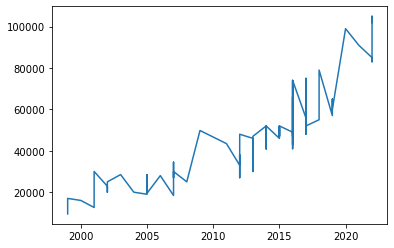

In [7]:
plt.plot(df_price_table.Year, df_price_table.Price)

## Useful Troubleshooting

Check for any nulls in the TRIM field

In [8]:
df_price_table[df_price_table['TRIM'].isnull()]

,Stock Number,VIN,TRIM,Year,Mileage,Transmission,HP,Roof,Price,Date Listed,State,Date,Notes,Title,Last Checked,URL,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,DaysAged


## Define Functions for Year-Based Plots

I use this plot to explore how prices, trim, and mileage interact

In [9]:
def plot_miles(df, str_title):
    fig, ax = plt.subplots()
    ax.scatter(df.Mileage, df.Price, s=10+5*df.DaysAged)
    ax.set_title(str_title + " | Larger is Older")
    ax.set_xlabel('Miles')
    ax.set_ylabel('Price, USD')

    for i, txt in enumerate(df.TRIM):
        ax.annotate(txt, (df['Mileage'][[df.index[i]]], df['Price'][[df.index[i]]] ))

## 2005 Year

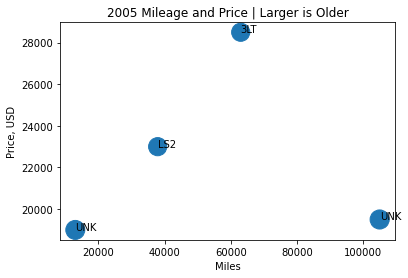

In [10]:
df_2005 = df_price_table[df_price_table.Year==2005]
str_title = '2005 Mileage and Price'
plot_miles(df_2005, str_title)

## 2012 Year

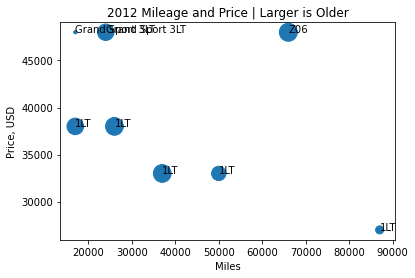

In [11]:
df_2012 = df_price_table[df_price_table.Year==2012]
str_title = '2012 Mileage and Price'
plot_miles(df_2012, str_title)

## 2013 Year - Grand Sport

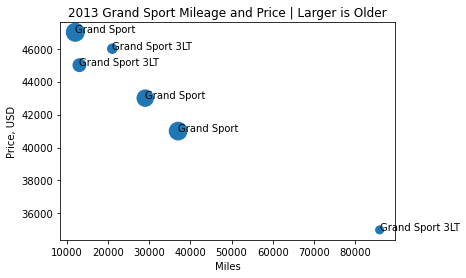

In [12]:
df_gs = df_price_table[df_price_table['TRIM'].str.contains("Grand")]
df_2013 = df_gs[df_gs.Year==2013]
str_title = '2013 Grand Sport Mileage and Price'
plot_miles(df_2013, str_title)

## 2014 Year - Z51

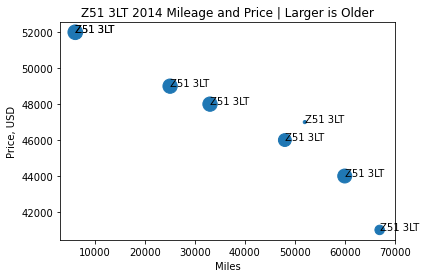

In [22]:
df_z51 = df_price_table[df_price_table['TRIM'].str.contains("Z51 3LT")]
df_2014 = df_z51[df_z51.Year==2014]
str_title = 'Z51 3LT 2014 Mileage and Price'
plot_miles(df_2014, str_title)

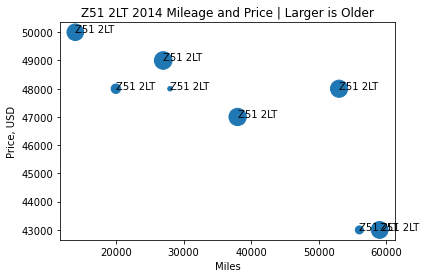

In [13]:
df_z51 = df_price_table[df_price_table['TRIM'].str.contains("Z51 2LT")]
df_2014 = df_z51[df_z51.Year==2014]
str_title = 'Z51 2LT 2014 Mileage and Price'
plot_miles(df_2014, str_title)

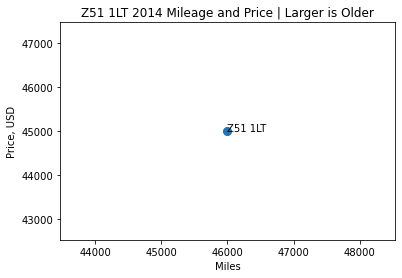

In [14]:
df_z51_1lt = df_price_table[df_price_table['TRIM'].str.contains("Z51 1LT")]
df_2014 = df_z51_1lt[df_z51_1lt.Year==2014]
str_title = 'Z51 1LT 2014 Mileage and Price'
plot_miles(df_2014, str_title)

## 2014 Year - Other Trims

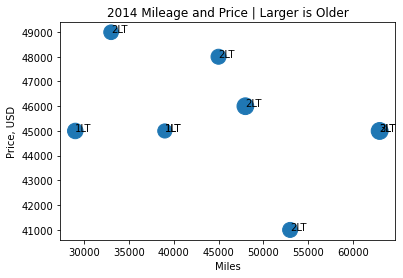

In [15]:
df_not_z51 = df_price_table[~df_price_table['TRIM'].str.contains("Z51")]
df_2014 = df_not_z51[df_not_z51.Year==2014]
str_title = '2014 Mileage and Price'
plot_miles(df_2014, str_title)

## 2015 Year - Z51

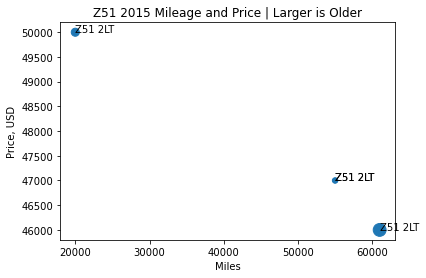

In [16]:
df_z51 = df_price_table[df_price_table['TRIM'].str.contains("Z51")]
df_2015 = df_z51[df_z51.Year==2015]
str_title = 'Z51 2015 Mileage and Price'
plot_miles(df_2015, str_title)

## 2016 Year - Z51

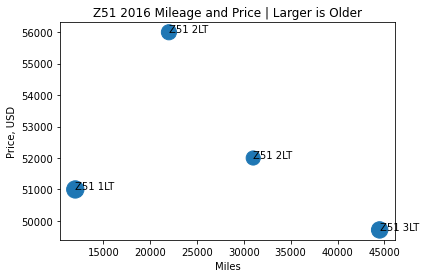

In [17]:
df_z51 = df_price_table[df_price_table['TRIM'].str.contains("Z51")]
df_2016 = df_z51[df_z51.Year==2016]
str_title = 'Z51 2016 Mileage and Price'
plot_miles(df_2016, str_title)

## 2016 Year - Other Trims

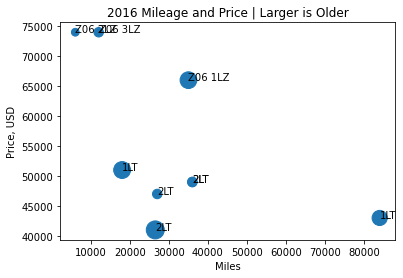

In [18]:
df_not_z51 = df_price_table[~df_price_table['TRIM'].str.contains("Z51")]
df_2016 = df_not_z51[df_not_z51.Year==2016]
str_title = '2016 Mileage and Price'
plot_miles(df_2016, str_title)

## 2017 Years

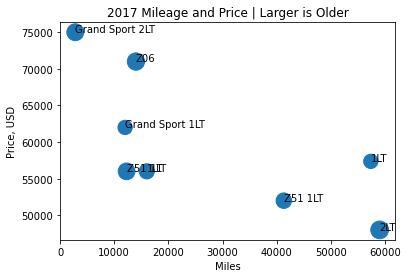

In [19]:
df_2017 = df_price_table[df_price_table.Year==2017]
str_title = '2017 Mileage and Price'
plot_miles(df_2017, str_title)

## 2019 Years

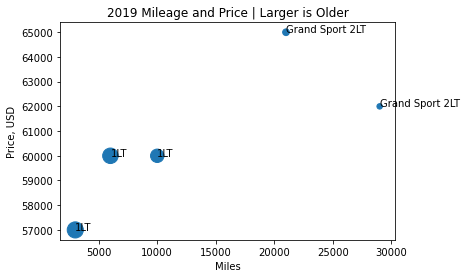

In [20]:
df_2019 = df_price_table[df_price_table.Year==2019]
str_title = '2019 Mileage and Price'
plot_miles(df_2019, str_title)

## 2022 Years

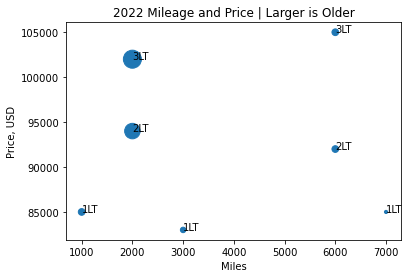

In [21]:
df_2022 = df_price_table[df_price_table.Year==2022]
str_title = '2022 Mileage and Price'
plot_miles(df_2022, str_title)